In [1]:
import albumentations as A
import cv2
from torchvision.datasets import CIFAR10
import yaml
from torchvision.transforms import transforms
import torch
import numpy as np

# # Declare an augmentation pipeline
# transform = A.Compose([
#     A.RandomCrop(width=256, height=256),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.2),
# ])

# # Read an image with OpenCV and convert it to the RGB colorspace
# image = cv2.imread("image.jpg")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Augment an image
# transformed = transform(image=image)
# transformed_image = transformed["image"]

In [2]:
config = None
with open("config.yml","r") as f:
    config = yaml.safe_load(f)

In [3]:
config

{'epochs': 20,
 'learning_rate': 0.01,
 'momentum': 0.9,
 'weight_decay': 0.0001,
 'batch_size': 128,
 'dropout_rate': 0.1,
 'initial_channels': 8,
 'train_data_path': '../data',
 'test_data_path': '../data',
 'normalize_mean': [0.4914, 0.4822, 0.4465],
 'normalize_std': [0.2023, 0.1994, 0.201],
 'p': 0.5,
 'p_horizonal_flip': 0.9,
 'shift_limit_left': -0.1,
 'shift_limit_right': 0.1,
 'scale_limit_min': -0.2,
 'scale_limit_max': 0.2,
 'rotation_degrees': 7,
 'classes': "('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')",
 'num_workers': 1,
 'pin_memory': True,
 'manual_seed': 1}

In [4]:
train_dataset = CIFAR10(
            config["train_data_path"],
            train=True,
            download=True,
        )

Files already downloaded and verified


In [5]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data
    Split: Train

In [6]:
next(iter(train_dataset))

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

In [7]:
images = np.array(train_dataset.data)


In [8]:
images = np.array([train_dataset[i][0] for i in range(len(train_dataset))])


In [9]:
# Find min and max pixel values
min_pixel = np.min(images)
max_pixel = np.max(images)

print('Minimum pixel value:', min_pixel)
print('Maximum pixel value:', max_pixel)

Minimum pixel value: 0
Maximum pixel value: 255


In [10]:
images = np.array(train_dataset.data) / 255.0  # Normalize to [0, 1]


In [11]:
# Calculate mean and standard deviation
mean = np.mean(images, axis=(0, 1, 2))  # Mean of each channel
std = np.std(images, axis=(0, 1, 2))      # Std of each channel

print('Mean:', mean)
print('Standard Deviation:', std)

Mean: [0.49139968 0.48215841 0.44653091]
Standard Deviation: [0.24703223 0.24348513 0.26158784]


In [12]:
from data import CIFAR10Data

In [13]:
import matplotlib.pyplot as plt # for visualizing images
import numpy as np
import torchvision

def imshow(img):
  '''
  function to show an image
  '''
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))



Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.68545556..1.8768656].


    ,     p     l     n


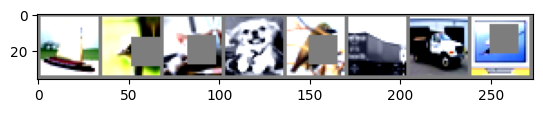

In [16]:

CIFAR10_Dataset = CIFAR10Data()
batch_size = 4
trainloader = CIFAR10_Dataset.get_train_loader()# get some random training images
images, labels = next(iter(trainloader))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % config['classes'][labels[j]] for j in range(batch_size)))